In [855]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
# Create a DataFrame and display the first few rows
import pandas as pd

In [856]:
# Generate 100 data points
money = np.linspace(-25, 25, 100)  # -100 to 100 inclusive
happiness = (2000*money) + 3 + np.random.normal(0, 1, 100)  # 2x^2 + 3 with some noise

In [857]:
class PolynomialRegression:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.data_length = len(x)
        self.m1 = np.random.randn()
        self.m2 = np.random.randn()
        self.b = np.random.randn()
        self.lr = 0.00001

    def mse_grad(self):
        # formula: y = m3x^3 + m2x^2 + m1x + b
        # mse = 1/n * sum((y - y_pred)^2)
        d_m1 = -2/self.data_length * sum(self.x * (self.y - (self.m2 * self.x**2 + self.m1 * self.x + self.b)))
        d_m2 = -2/self.data_length * sum(self.x**2 * (self.y - (self.m2 * self.x**2 + self.m1 * self.x + self.b)))
        d_b = -2/self.data_length * sum(self.y - (self.m2 * self.x**2 + self.m1 * self.x + self.b))
        
        self.m1 -= d_m1 * self.lr 
        self.m2 -= d_m2 * self.lr
        self.b -= d_b * self.lr
    
    def train(self, epochs=1000):
        for _ in range(epochs):
            print(f'function: {self.m2}x^2 + {self.m1}x + {self.b}')
            self.mse_grad()

In [858]:
model = PolynomialRegression(money, happiness)

In [859]:
model.train(10000)

function: 1.141149063697092x^2 + -0.8165406457713069x + -1.2821919264035486
function: -0.6952360033182805x^2 + 7.688593895417833x + -1.2869561906295452
function: 0.45445706018624343x^2 + 16.15757445560277x + -1.2839141772567662
function: -0.2653236801312614x^2 + 24.5905547196354x + -1.2857593879992526
function: 0.1853044404122901x^2 + 32.987687719077655x + -1.2845448878151309
function: -0.09681742397444282x^2 + 41.34912583497851x + -1.2852459607499225
function: 0.07980855469851461x^2 + 49.67502080063922x + -1.284747764263295
function: -0.03077063597455655x^2 + 57.96552370436677x + -1.2850003868250237
function: 0.0384587774646398x^2 + 66.22078499221567x + -1.2847829496938137
function: -0.004883369649130449x^2 + 74.44095447071808x + -1.2848598001923799
function: 0.022251401226083593x^2 + 82.62618130960229x + -1.2847524085454138
function: 0.0052631631941642935x^2 + 90.77661404449965x + -1.2847603646632166
function: 0.01589871988438185x^2 + 98.89240057964008x + -1.2846961063103979
function

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


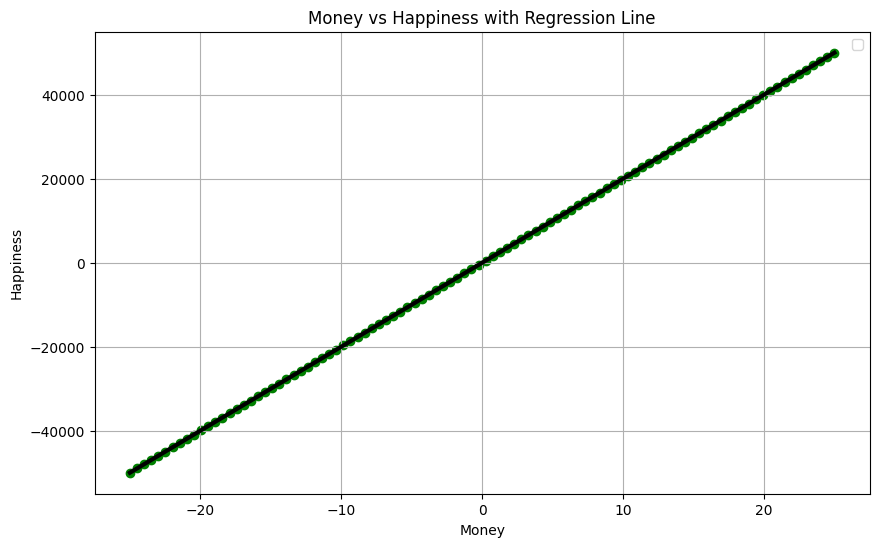

In [860]:
data = pd.DataFrame({'money': money, 'happiness': happiness})
# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['money'], data['happiness'], color='green')

formula = model.m2 * data['money']**2 + model.m1 * data['money'] + model.b

# Plot the regression line
plt.plot(data['money'], formula, color='black', linewidth=3)

# Add plot details
plt.title('Money vs Happiness with Regression Line')
plt.xlabel('Money')
plt.ylabel('Happiness')
plt.grid(True)  
plt.legend()
plt.show()